# Data Exploration

## NFL Big Data Bowl 2026 — Prediction

### Dataset Description

Here you'll find a summary of each dataset in the 2026 NFL Big Data Bowl, along with key variables, join keys, and variable descriptions.  
The tracking data is provided by the NFL Next Gen Stats team.

---

### Competition Phases and Data Updates

The competition proceeds in two phases:

1. Model Training Phase — using data from historic games.  
2. Forecasting Phase — with a test set composed of all games remaining in the NFL season after the submission deadline.

During the forecasting phase, the evaluation API will serve data only from previously unseen games.

---

## Files Overview

### `train/`
**Files:** `input_2023_w[01–18].csv`

Tracking data before the pass is thrown.

| Column | Description |
|:--|:--|
| `game_id` | Game identifier, unique (numeric) |
| `play_id` | Play identifier, not unique across games (numeric) |
| `player_to_predict` | Whether the x/y prediction for this player will be scored (bool) |
| `nfl_id` | Player identifier, unique across players (numeric) |
| `frame_id` | Frame number starting at 1 for each game/play/type (numeric) |
| `play_direction` | Direction the offense is moving (left/right) |
| `absolute_yardline_number` | Distance from end zone for possession team (numeric) |
| `player_name` | Player full name |
| `player_height` | Height (ft-in) |
| `player_weight` | Weight (lbs) |
| `player_birth_date` | Birth date (yyyy-mm-dd) |
| `player_position` | Position (role on the field) |
| `player_side` | Team side (Offense / Defense) |
| `player_role` | Role on the play (Defensive Coverage, Targeted Receiver, Passer, Other Route Runner) |
| `x`, `y` | Player position on field (yards) |
| `s` | Speed (yards/second) |
| `a` | Acceleration (yards/second²) |
| `o` | Orientation (degrees) |
| `dir` | Direction of motion (degrees) |
| `num_frames_output` | Number of frames to predict in output data (numeric) |
| `ball_land_x`, `ball_land_y` | Ball landing coordinates (yards) |

---

### `output_2023_w[01–18].csv`

Tracking data after the pass is thrown.

| Column | Description |
|:--|:--|
| `game_id` | Game identifier (numeric) |
| `play_id` | Play identifier (numeric) |
| `nfl_id` | Player identifier (numeric) |
| `frame_id` | Frame number, consistent with `num_frames_output` from input (numeric) |
| `x`, `y` | Player positions — TARGETS TO PREDICT (yards) |

---

### `test_input.csv`

Player tracking data for the same plays as predictions.  
This file is provided only for convenience — the actual test data will be provided dynamically via the evaluation API.

---

### `test.csv`

Mock test set representing the structure of the unseen test set.  
Includes prediction targets (`game_id`, `play_id`, `nfl_id`, `frame_id`) for evaluation.  
Like `test_input.csv`, it is only a placeholder; real test data comes from the API.

---

### `kaggle_evaluation/`

Support files used by the evaluation API.  
See the demo submission for usage examples.

---

Source: [Kaggle – NFL Big Data Bowl 2026](https://www.kaggle.com/competitions/nfl-big-data-bowl-2026-prediction)


In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [56]:
df_input = pd.read_csv("/Users/joseluisdeleoncarmona/Documents/nfl-big-data-bowl-2026-prediction/data/raw/train/input_2023_w01.csv")
df_output = pd.read_csv("/Users/joseluisdeleoncarmona/Documents/nfl-big-data-bowl-2026-prediction/data/raw/train/output_2023_w01.csv")

In [57]:
df_input.head()

,game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,...,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
0,2023090700,101,False,54527,1,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.33,36.94,0.09,0.39,322.40,238.24,21,63.259998,-0.22
1,2023090700,101,False,54527,2,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.33,36.94,0.04,0.61,200.89,236.05,21,63.259998,-0.22
2,2023090700,101,False,54527,3,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.33,36.93,0.12,0.73,147.55,240.60,21,63.259998,-0.22
3,2023090700,101,False,54527,4,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.35,36.92,0.23,0.81,131.40,244.25,21,63.259998,-0.22
4,2023090700,101,False,54527,5,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.37,36.90,0.35,0.82,123.26,244.25,21,63.259998,-0.22


In [58]:
df_output.head()

,game_id,play_id,nfl_id,frame_id,x,y
0,2023090700,101,46137,1,56.22,17.28
1,2023090700,101,46137,2,56.63,16.88
2,2023090700,101,46137,3,57.06,16.46
3,2023090700,101,46137,4,57.48,16.02
4,2023090700,101,46137,5,57.91,15.56


In [59]:
print(df_input.shape)

(285714, 23)


In [60]:
#df_input = df_input[df_input['player_to_predict'] == True]

print(df_input.shape)

(285714, 23)


In [61]:
print("Cantidad de juegos únicos:", df_input['game_id'].nunique())
print("Cantidad de jugadas únicas:", df_input['play_id'].nunique())
print("Cantidad de jugadores únicos:", df_input['nfl_id'].nunique())

Cantidad de juegos únicos: 16
Cantidad de jugadas únicas: 748
Cantidad de jugadores únicos: 737


In [62]:
# Sample

game_id = df_input['game_id'].unique()[1]
play_id = df_input[df_input['game_id'] == game_id]['play_id'].unique()[0]
nfl_id = df_input[(df_input['game_id'] == game_id) & (df_input['play_id'] == play_id)]['nfl_id'].unique()[0]

print(f"Game ID: {game_id}, Play ID: {play_id}, NFL ID: {nfl_id}")

Game ID: 2023091000, Play ID: 185, NFL ID: 52424


In [63]:
input_sample = df_input[(df_input['game_id'] == game_id) & (df_input['play_id'] == play_id) ] #& (df_input['nfl_id'] == nfl_id)]
output_sample = df_output[(df_output['game_id'] == game_id) & (df_output['play_id'] == play_id)] #& (df_output['nfl_id'] == nfl_id)]

print(input_sample.shape)
print(output_sample.shape)

(276, 23)
(45, 6)


In [64]:
input_sample.head(26)

,game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,...,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
21953,2023091000,185,True,52424,1,left,66,A.J. Terrell,6-2,190,...,Defensive Coverage,57.07,35.13,0.00,0.00,324.62,107.82,9,55.57,27.799999
21954,2023091000,185,True,52424,2,left,66,A.J. Terrell,6-2,190,...,Defensive Coverage,57.07,35.13,0.00,0.00,321.13,107.82,9,55.57,27.799999
21955,2023091000,185,True,52424,3,left,66,A.J. Terrell,6-2,190,...,Defensive Coverage,57.07,35.13,0.00,0.00,314.24,109.04,9,55.57,27.799999
21956,2023091000,185,True,52424,4,left,66,A.J. Terrell,6-2,190,...,Defensive Coverage,57.06,35.13,0.00,0.00,313.35,109.04,9,55.57,27.799999
21957,2023091000,185,True,52424,5,left,66,A.J. Terrell,6-2,190,...,Defensive Coverage,57.06,35.13,0.00,0.00,301.84,109.04,9,55.57,27.799999
21958,2023091000,185,True,52424,6,left,66,A.J. Terrell,6-2,190,...,Defensive Coverage,57.05,35.12,0.06,1.07,250.78,109.04,9,55.57,27.799999
21959,2023091000,185,True,52424,7,left,66,A.J. Terrell,6-2,190,...,Defensive Coverage,57.03,35.12,0.29,2.30,253.30,111.65,9,55.57,27.799999
21960,2023091000,185,True,52424,8,left,66,A.J. Terrell,6-2,190,...,Defensive Coverage,56.98,35.11,0.63,3.11,254.21,110.55,9,55.57,27.799999
21961,2023091000,185,True,52424,9,left,66,A.J. Terrell,6-2,190,...,Defensive Coverage,56.90,35.08,1.03,3.62,252.72,107.71,9,55.57,27.799999
21962,2023091000,185,True,52424,10,left,66,A.J. Terrell,6-2,190,...,Defensive Coverage,56.77,35.04,1.48,3.72,252.39,107.71,9,55.57,27.799999


In [65]:
output_sample.head(26)

,game_id,play_id,nfl_id,frame_id,x,y
2349,2023091000,185,52424,1,53.37,33.15
2350,2023091000,185,52424,2,53.28,32.83
2351,2023091000,185,52424,3,53.24,32.45
2352,2023091000,185,52424,4,53.23,32.03
2353,2023091000,185,52424,5,53.26,31.55
2354,2023091000,185,52424,6,53.32,31.03
2355,2023091000,185,52424,7,53.41,30.46
2356,2023091000,185,52424,8,53.52,29.86
2357,2023091000,185,52424,9,53.64,29.23
2358,2023091000,185,52272,1,59.58,33.76


In [66]:
display(input_sample[['game_id', 'play_id', 'nfl_id', 'frame_id', 'x', 'y', 's', 'a', 'dir']])

,game_id,play_id,nfl_id,frame_id,x,y,s,a,dir
21953,2023091000,185,52424,1,57.07,35.13,0.00,0.00,324.62
21954,2023091000,185,52424,2,57.07,35.13,0.00,0.00,321.13
21955,2023091000,185,52424,3,57.07,35.13,0.00,0.00,314.24
21956,2023091000,185,52424,4,57.06,35.13,0.00,0.00,313.35
21957,2023091000,185,52424,5,57.06,35.13,0.00,0.00,301.84
...,...,...,...,...,...,...,...,...,...
22224,2023091000,185,53488,19,59.33,32.11,6.16,1.65,252.92
22225,2023091000,185,53488,20,58.76,31.92,5.90,2.35,251.03
22226,2023091000,185,53488,21,58.23,31.71,5.58,3.15,247.60
22227,2023091000,185,53488,22,57.74,31.48,5.25,3.65,244.21


In [88]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_field(ax=None):
    """Draw an NFL field: 120x53.3 yards, with green grass and end zones."""
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
    
    # Fondo verde del campo
    ax.add_patch(
        patches.Rectangle(
            (0, 0), 120, 53.3,
            linewidth=0, facecolor="#4CAF50"  # tono verde césped
        )
    )

    # Zonas de anotación (end zones)
    ax.add_patch(
        patches.Rectangle((0, 0), 10, 53.3, linewidth=0, facecolor="#000080", alpha=0.5)
    )
    ax.add_patch(
        patches.Rectangle((110, 0), 10, 53.3, linewidth=0, facecolor="#000080", alpha=1)
    )

    # Líneas de cada 10 yardas
    for x in range(10, 111, 10):
        lw = 2 if x in [10, 110] else 0.5
        ax.plot([x, x], [0, 53.3], color="white", lw=lw, linestyle="--", alpha=0.7)

    # Etiquetas de yardas
    for x in range(20, 111, 10):
        ax.text(x, 1, f"{x-10}", color="white", fontsize=8, va="bottom", ha="center")

    # Configuración general
    
    ax.axis("off")
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 53.3)
    ax.set_aspect("equal")
    ax.set_xlabel("X (yards)")
    ax.set_ylabel("Y (yards)")
    ax.set_title("NFL Field Coordinate System")
    ax.set_facecolor("#4CAF50")  # asegura que el fondo fuera del rectángulo también sea verde

    return ax



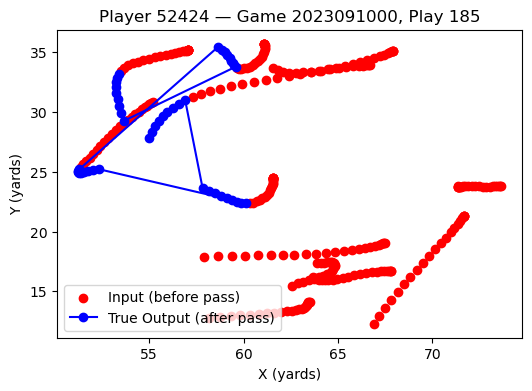

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(input_sample["x"], input_sample["y"], c="red", label="Input (before pass)")
plt.plot(output_sample["x"], output_sample["y"], c="blue", marker="o", label="True Output (after pass)")
plt.xlabel("X (yards)")
plt.ylabel("Y (yards)")
plt.title(f"Player {nfl_id} — Game {game_id}, Play {play_id}")
plt.legend()
plt.show()


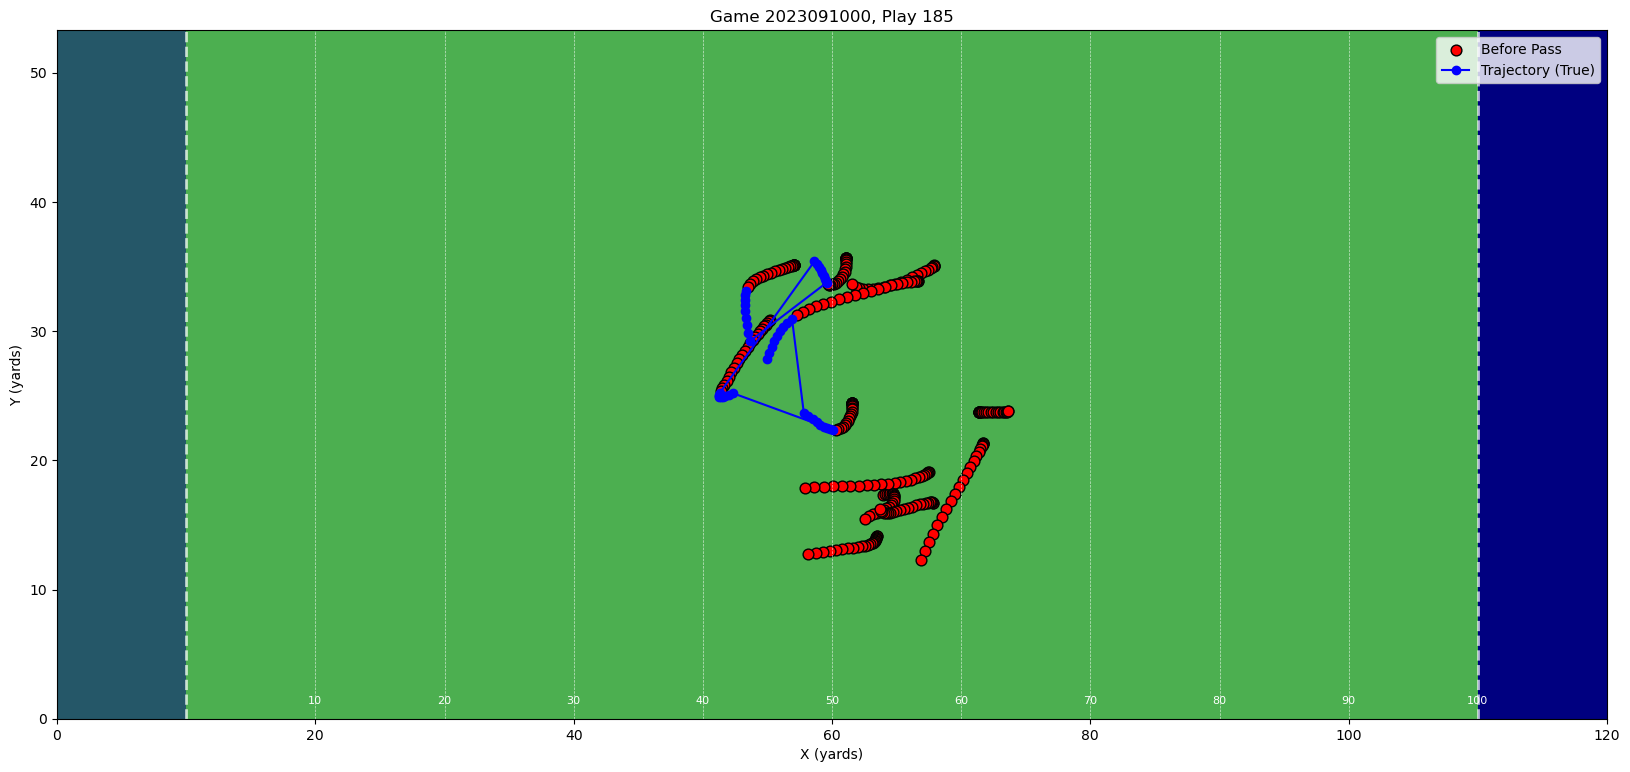

In [83]:
ax = plot_field()

# Punto antes del pase
ax.scatter(input_sample["x"], input_sample["y"], c="red", label="Before Pass", s=60, edgecolors='k')

# Trayectoria posterior
ax.plot(output_sample["x"], output_sample["y"], c="blue", marker="o", label="Trajectory (True)")

ax.legend(loc="upper right")
ax.set_title( f"Game {game_id}, Play {play_id}")
plt.show()


In [79]:
import matplotlib.pyplot as plt

def plot_play_with_players(play_input, play_output, title=None):
    ax = plot_field()

    # tomamos los jugadores que aparecen en el output (los que tienen trayectoria)
    player_ids = play_output["nfl_id"].unique()

    for i, pid in enumerate(player_ids):
        # datos antes del pase (suele ser 1 frame por jugador en este input)
        p_in = play_input[play_input["nfl_id"] == pid]

        # datos después del pase
        p_out = play_output[play_output["nfl_id"] == pid].sort_values("frame_id")

        # elegimos un color por jugador usando un ciclo
        color = f"C{i % 10}"

        # punto inicial
        ax.scatter(
            p_in["x"],
            p_in["y"],
            color=color,
            s=50,
            label=f"nfl_id={pid} (start)"
        )

        # trayectoria
        ax.plot(
            p_out["x"],
            p_out["y"],
            color=color,
            marker="o",
            linewidth=2,
            alpha=0.8
        )

    ax.set_title(title or "Play trajectories by player")
    ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()



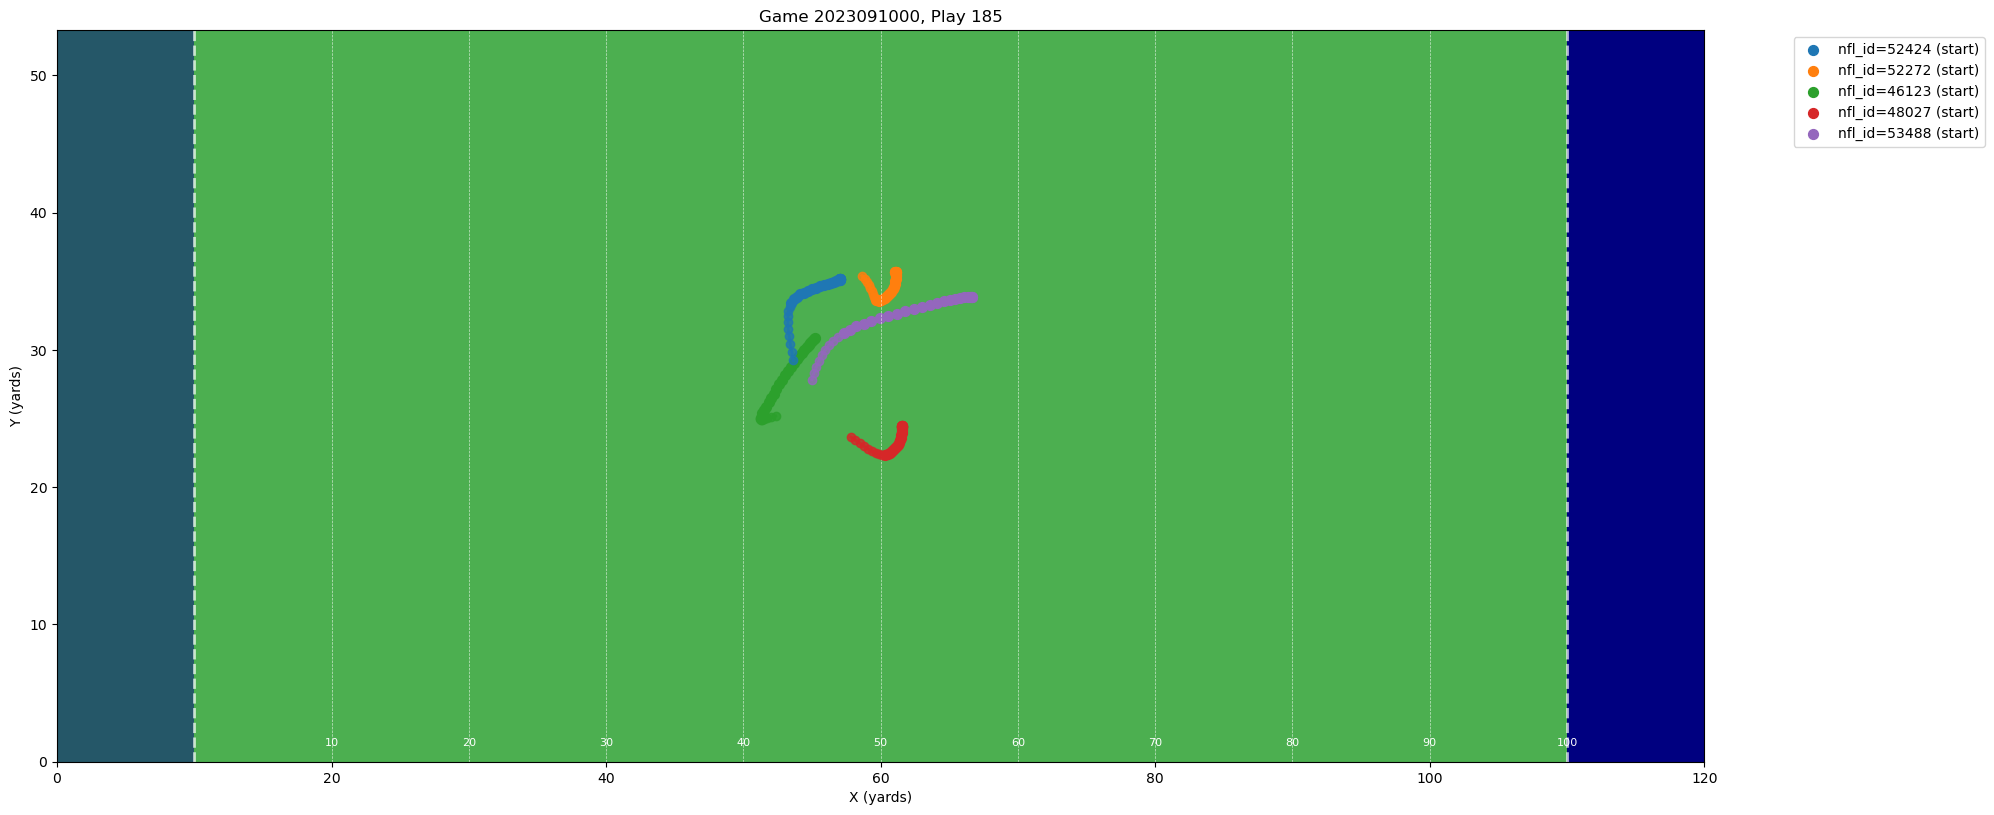

In [84]:
plot_play_with_players(input_sample, output_sample, title=f"Game {game_id}, Play {play_id}")

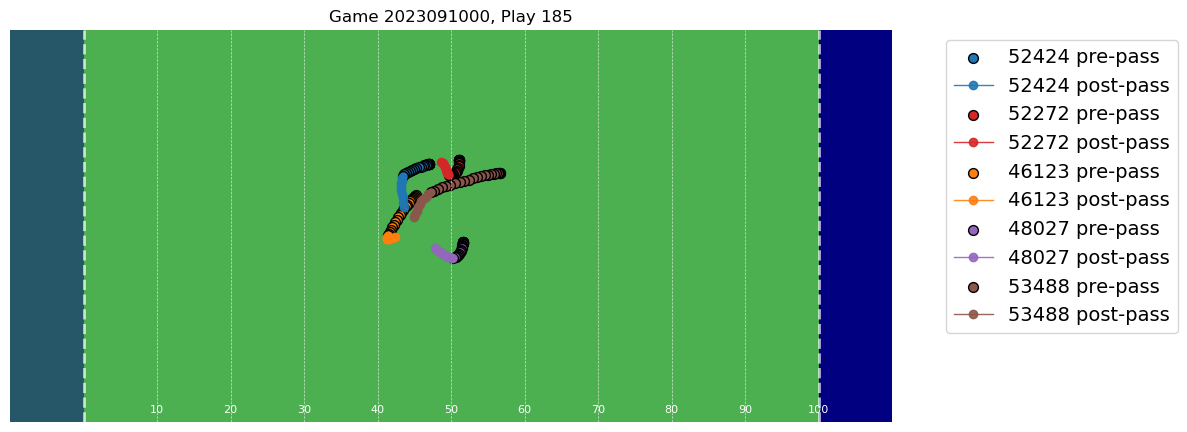

In [93]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import matplotlib.pyplot as plt

def plot_play_pre_post(play_input, play_output, title=None):
    """
    Dibuja todos los jugadores de una jugada.
    Para cada jugador:
      - punto pre-pass (del input)
      - trayectoria post-pass (del output)
    Evita usar tonos verdes para que destaquen sobre el campo.
    """

    ax = plot_field()

    # Paleta personalizada sin verdes (azules, rojos, naranjas, morados, grises)
    color_palette = [
        "#1f77b4",  # azul
        "#d62728",  # rojo
        "#ff7f0e",  # naranja
        "#9467bd",  # morado
        "#8c564b",  # marrón
        "#e377c2",  # rosa
        "#7f7f7f",  # gris
        "#bcbd22",  # oliva amarillento
        "#17becf",  # cian
        "#ff1493",  # fucsia
    ]

    player_ids = play_output["nfl_id"].unique()

    for i, pid in enumerate(player_ids):
        color = color_palette[i % len(color_palette)]

        # pre-pass (punto)
        p_in = play_input[play_input["nfl_id"] == pid]
        if not p_in.empty:
            ax.scatter(
                p_in["x"],
                p_in["y"],
                color=color,
                s=50,
                edgecolors="black",
                label=f"{pid} pre-pass"
            )

        # post-pass (trayectoria)
        p_out = play_output[play_output["nfl_id"] == pid].sort_values("frame_id")
        if not p_out.empty:
            ax.plot(
                p_out["x"],
                p_out["y"],
                color=color,
                marker="o",
                linewidth=1,
                alpha=0.9,
                label=f"{pid} post-pass"
            )

    ax.set_title(title or "Play trajectories (pre vs post pass)")
    ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=14)
    plt.tight_layout()
    plt.show()

plot_play_pre_post(input_sample, output_sample, title=f"Game {game_id}, Play {play_id}")